#                                         Iris Flower Classification

## Importing Libraries & Packages

In [1]:
# importing libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
sns.set(style="white", color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Importing Dataset

In [2]:
data=pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.shape

(150, 6)

In [4]:
data["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

## Plotting Graph

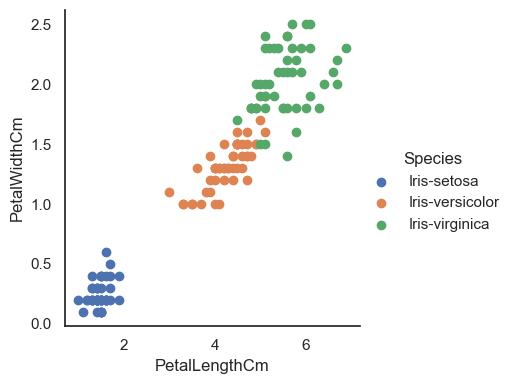

In [5]:
sns.FacetGrid(data, hue="Species",height=4).map(plt.scatter, "PetalLengthCm", "PetalWidthCm").add_legend()

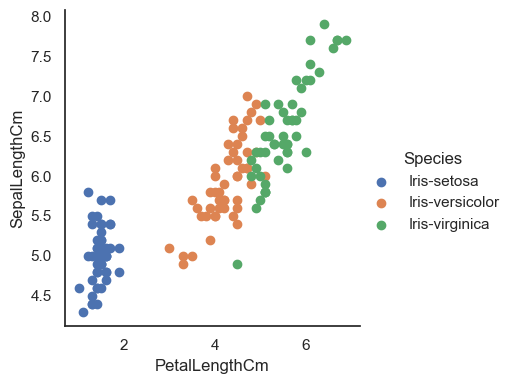

In [6]:
sns.FacetGrid(data, hue="Species",height=4).map(plt.scatter, "PetalLengthCm", "SepalLengthCm").add_legend()

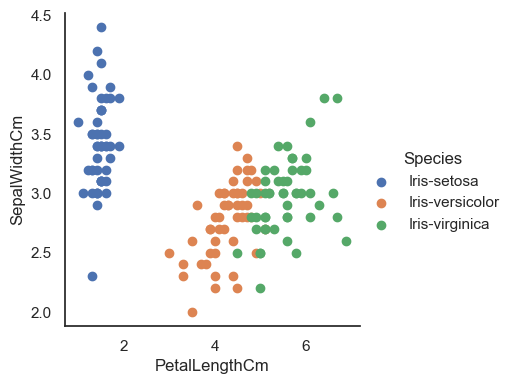

In [7]:
sns.FacetGrid(data, hue="Species",height=4).map(plt.scatter, "PetalLengthCm", "SepalWidthCm").add_legend()

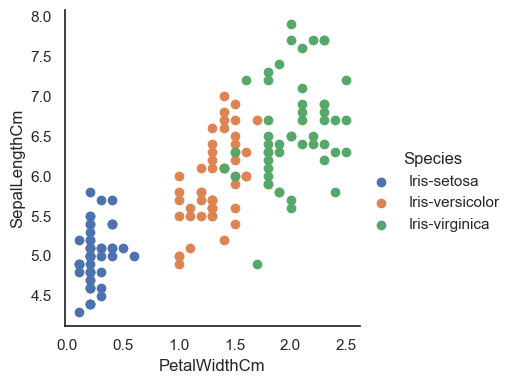

In [8]:
sns.FacetGrid(data, hue="Species",height=4).map(plt.scatter, "PetalWidthCm", "SepalLengthCm").add_legend()

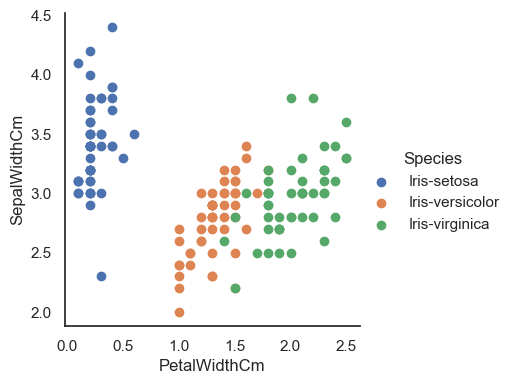

In [9]:
sns.FacetGrid(data, hue="Species",height=4).map(plt.scatter, "PetalWidthCm", "SepalWidthCm").add_legend()

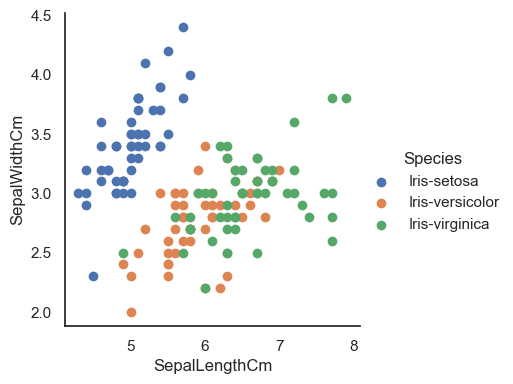

In [10]:
sns.FacetGrid(data, hue="Species",height=4).map(plt.scatter, "SepalLengthCm", "SepalWidthCm").add_legend()

## Mapping the Output

In [11]:
flower_mapping={'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}
data["Species"]=data["Species"].map(flower_mapping)

In [12]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


## Splitting the Dataset

In [13]:
x=data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values
y=data[['Species']].values

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 123)

## Model Training

In [15]:
LR=LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

## Model Testing

In [16]:
pred_lr = LR.predict(x_test)
print("Accuracy of the model: ",LR.score(x_test, y_test))
print("\nClassification Report: \n")
print(classification_report(y_test,pred_lr))

Accuracy of the model:  0.9736842105263158

Classification Report: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.89      1.00      0.94         8
           2       1.00      0.93      0.96        14

    accuracy                           0.97        38
   macro avg       0.96      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



## Confusion Matrix Plot

Confusion Matrix Plot : 


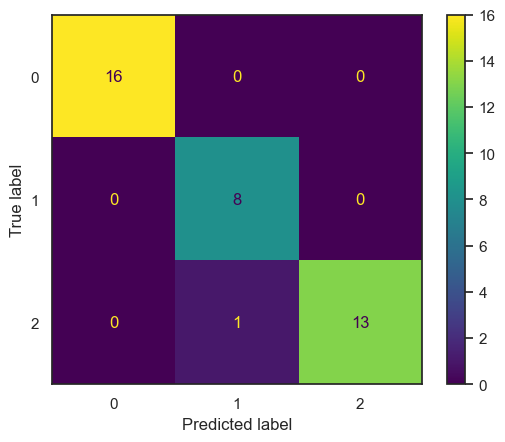

In [17]:
# Confusion matrix of Results from Logistic Regression
print("Confusion Matrix Plot : ")

cm = confusion_matrix(y_test, pred_lr, labels=LR.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR.classes_)
disp.plot()
plt.show()